In [10]:
import tweepy

key = 'nXIiPLzgMv5DWXdTfO4nasrZO'
s_key = 'xq5FrcsTxm4zcdWHXPMvhqGGR4oHTtuSnoJJsqKWYiCE7YjIN0'
token = '304408446-v6FiV7cXUOVpmN23FM3SvDfUSomJGCo3khAUFIJE'
s_token = 'FCZxGa4WZBywrAdWEsplRWaf33JbEPrxXIq5v8QRBlHnr'
# 핸들러 생성, 개인정보 인증 요청
auth = tweepy.OAuthHandler(key, s_key)
# Access 요청
auth.set_access_token(token, s_token)
# twitter API 생성
api = tweepy.API(auth)
keyword = '안락사'
tweets = api.search(keyword, count = 3000) # 트윗 개수(RT는 밑 함수에서 제거)
result = []


txt = []
for i in tweets:
    txt.append(i.text)



In [11]:
# 형태소 : 의미를 가지는 최소 단위
from konlpy.tag import Twitter
twitter = Twitter()

morphs = []
morph_list = []


for i in txt:
    morphs = twitter.nouns(i)       # nouns로 명사만 fetch, 정보의 유실이 많음.
    for morph in morphs:
        morph_list.append(morph)


c:\users\lgut\anaconda3\envs\nltk\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [12]:
len(morph_list) # 길이

1261

In [13]:
from collections import Counter
count = Counter(morph_list)        # 개수

In [14]:
 count.most_common()

[('안락사', 111),
 ('보호', 34),
 ('소', 34),
 ('예정', 28),
 ('입양', 28),
 ('대량', 24),
 ('임보', 23),
 ('부탁', 23),
 ('판매', 22),
 ('함안군', 22),
 ('민원', 22),
 ('내일', 22),
 ('비용', 16),
 ('방법', 14),
 ('강아지', 14),
 ('사이트', 12),
 ('강력', 11),
 ('가족', 11),
 ('내', 10),
 ('아이스', 9),
 ('자살', 9),
 ('약', 9),
 ('마리', 9),
 ('경주마', 9),
 ('골절', 9),
 ('이유', 9),
 ('시', 8),
 ('물뽕', 8),
 ('알티', 8),
 ('아이', 8),
 ('출국', 8),
 ('마련', 8),
 ('것', 7),
 ('구입', 7),
 ('대요', 7),
 ('곳', 6),
 ('초', 6),
 ('구조', 6),
 ('호소', 6),
 ('말', 6),
 ('안락', 6),
 ('형제', 6),
 ('신고', 6),
 ('표정', 6),
 ('프로포폴', 5),
 ('엑스터시', 5),
 ('분', 5),
 ('천안', 5),
 ('비', 5),
 ('위', 5),
 ('기부', 5),
 ('진행', 5),
 ('노력', 5),
 ('약물', 5),
 ('사약', 5),
 ('공원', 5),
 ('아기', 5),
 ('명', 5),
 ('입소', 5),
 ('날', 5),
 ('전단지', 5),
 ('작대기', 4),
 ('직거래', 4),
 ('달', 4),
 ('그냥', 4),
 ('시보', 4),
 ('오천원', 4),
 ('만원', 4),
 ('릴레이', 4),
 ('이면', 4),
 ('대거', 4),
 ('단', 4),
 ('해외', 4),
 ('현재', 4),
 ('번', 4),
 ('나', 4),
 ('이', 4),
 ('요청', 4),
 ('그', 4),
 ('정품', 3),
 ('가격', 3),
 ('수면제', 3),

In [15]:
import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

mask = np.array(Image.open("cat.png"))
morph_list

['필로폰',
 '곳',
 '정품',
 '아이스',
 '작대기',
 '판매',
 '프로포폴',
 '판매',
 '가격',
 '아이스',
 '판매',
 '사이트',
 '함안군',
 '보호',
 '소',
 '민원',
 '내일',
 '대량',
 '안락사',
 '예정',
 '임보',
 '입양',
 '부탁',
 '수면제',
 '과다복용',
 '시',
 '엑스터시',
 '직거래',
 '자살',
 '약',
 '안락사',
 '방법',
 '초',
 '강력',
 '물뽕',
 '판매',
 '사이트',
 '함안군',
 '보호',
 '소',
 '민원',
 '내일',
 '대량',
 '안락사',
 '예정',
 '임보',
 '입양',
 '부탁',
 '함안군',
 '보호',
 '소',
 '민원',
 '내일',
 '대량',
 '안락사',
 '예정',
 '임보',
 '입양',
 '부탁',
 '보호',
 '소',
 '달',
 '내',
 '안락사',
 '구',
 '예방접종',
 '중성',
 '화랑',
 '이유식',
 '것',
 '정말',
 '그냥',
 '무작정',
 '구조',
 '경제',
 '여유',
 '분',
 '함안군',
 '보호',
 '소',
 '민원',
 '내일',
 '대량',
 '안락사',
 '예정',
 '임보',
 '입양',
 '부탁',
 '함안군',
 '보호',
 '소',
 '민원',
 '내일',
 '대량',
 '안락사',
 '예정',
 '임보',
 '입양',
 '부탁',
 '보호',
 '소',
 '달',
 '내',
 '안락사',
 '구',
 '예방접종',
 '중성',
 '화랑',
 '이유식',
 '것',
 '정말',
 '그냥',
 '무작정',
 '구조',
 '경제',
 '여유',
 '분',
 '함안군',
 '보호',
 '소',
 '민원',
 '내일',
 '대량',
 '안락사',
 '예정',
 '임보',
 '입양',
 '부탁',
 '함안군',
 '보호',
 '소',
 '민원',
 '내일',
 '대량',
 '안락사',
 '예정',
 '임보',
 '입양',
 '부탁',
 '함안군',
 '보

In [16]:
import re

str_txt = ''
for i in morph_list:
    str_txt += re.sub('@.*','',i
                      .replace('RT', '').replace('\n', '')
                      .replace(':','').replace('알티', '')
                      .replace('RT', '').replace('(','')
                      .replace('https', '').replace('//','')
                      .replace(')', '')) + ' ' # RT, 개행 제거
str_txt

'필로폰 곳 정품 아이스 작대기 판매 프로포폴 판매 가격 아이스 판매 사이트 함안군 보호 소 민원 내일 대량 안락사 예정 임보 입양 부탁 수면제 과다복용 시 엑스터시 직거래 자살 약 안락사 방법 초 강력 물뽕 판매 사이트 함안군 보호 소 민원 내일 대량 안락사 예정 임보 입양 부탁 함안군 보호 소 민원 내일 대량 안락사 예정 임보 입양 부탁 보호 소 달 내 안락사 구 예방접종 중성 화랑 이유식 것 정말 그냥 무작정 구조 경제 여유 분 함안군 보호 소 민원 내일 대량 안락사 예정 임보 입양 부탁 함안군 보호 소 민원 내일 대량 안락사 예정 임보 입양 부탁 보호 소 달 내 안락사 구 예방접종 중성 화랑 이유식 것 정말 그냥 무작정 구조 경제 여유 분 함안군 보호 소 민원 내일 대량 안락사 예정 임보 입양 부탁 함안군 보호 소 민원 내일 대량 안락사 예정 임보 입양 부탁 함안군 보호 소 민원 내일 대량 안락사 예정 임보 입양 부탁 강력 물뽕 판매 사이트 졸 치사량 펜토 비탈 곳 안락사 비용 사용 후기 물 애더럴 구입 홍대 해피 벌룬 안락사 확정 보호 소 달 내 안락사 구 예방접종 중성 화랑 이유식 것 정말 그냥 무작정 구조 경제 여유 함안군 보호 소 민원 내일 대량 안락사 예정 임보 입양 부탁 안락사 비용 효과 흥분제 애시드 약 강력 각성제 판매 여성 흥분 제정 품 구입 함안군 보호 소 민원 내일 대량 안락사 예정 임보 입양 부탁 함안군 보호 소 민원 내일 대량 안락사 예정 임보 입양 부탁 함안군 보호 소 민원 내일 대량 안락사 예정 임보 입양 부탁 함안군 보호 소 민원 내일 대량 안락사 예정 임보 입양 부탁  천안 시보 호소 아이 출국 비 마련 위 오천원 만원 기부 릴레이 말 이면 대거 안락사 진행 예정 단 마리 해외 입양 노력 현재 마리 출국 비용 마련 함안군 보호 소 민원 내일 대량 안락사 예정 임보 입양 부탁 함안군 보호 소 민원 내일 대량 안락사 예정 임보 입양 부탁 개 용종 발견 대장 절제 후 엄마 안락사 부탁 배우 최준용 아내 함안군 보호 소 민원 내일

In [17]:
from collections import Counter
c = Counter(str_txt).most_common()
Counter(str_txt).most_common()

[(' ', 1261),
 ('안', 154),
 ('사', 145),
 ('락', 119),
 ('보', 67),
 ('이', 63),
 ('정', 51),
 ('소', 47),
 ('대', 46),
 ('호', 41),
 ('원', 41),
 ('아', 40),
 ('입', 40),
 ('기', 38),
 ('내', 33),
 ('예', 33),
 ('마', 32),
 ('부', 30),
 ('양', 29),
 ('지', 29),
 ('제', 28),
 ('비', 28),
 ('량', 27),
 ('일', 26),
 ('시', 25),
 ('강', 25),
 ('구', 25),
 ('가', 24),
 ('함', 24),
 ('군', 24),
 ('판', 23),
 ('임', 23),
 ('탁', 23),
 ('용', 23),
 ('스', 22),
 ('매', 22),
 ('민', 22),
 ('물', 21),
 ('리', 20),
 ('약', 19),
 ('방', 19),
 ('유', 19),
 ('거', 17),
 ('자', 17),
 ('력', 17),
 ('법', 16),
 ('전', 14),
 ('트', 13),
 ('경', 13),
 ('해', 13),
 ('면', 12),
 ('살', 12),
 ('분', 12),
 ('국', 12),
 ('위', 12),
 ('나', 12),
 ('신', 12),
 ('성', 11),
 ('단', 11),
 ('절', 11),
 ('족', 11),
 ('요', 11),
 ('그', 10),
 ('출', 10),
 ('진', 10),
 ('주', 10),
 ('골', 10),
 ('말', 9),
 ('천', 9),
 ('련', 9),
 ('동', 9),
 ('도', 9),
 ('형', 9),
 ('고', 9),
 ('로', 8),
 ('작', 8),
 ('수', 8),
 ('뽕', 8),
 ('여', 8),
 ('애', 8),
 ('오', 8),
 ('인', 8),
 ('품', 7),
 ('포', 7),
 ('터

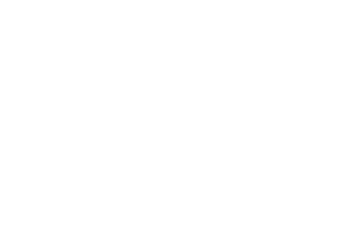

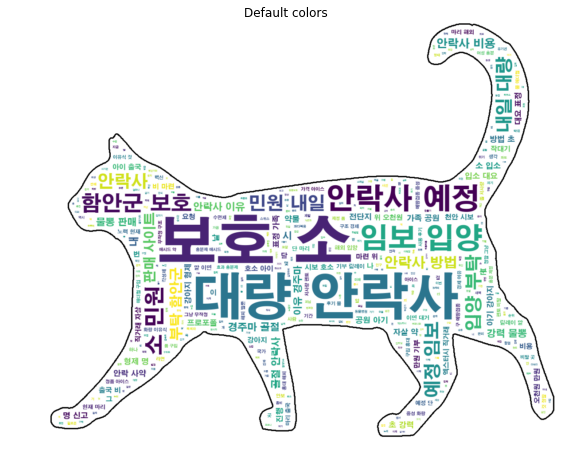

In [23]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/H2GTRE.TTF', max_words=500, mask=mask, margin=10,
               random_state=1, contour_color='black', background_color='white', contour_width=3).generate(str_txt)

wc.to_file("a_new_hope.png")
plt.axis("off")
plt.figure(figsize=(10,10))
plt.title("Default colors")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()